In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [6]:
era5_orig_ds = xr.open_dataset('aaron_aht_stuff/era5_aht.nc').sel(time=slice('1980-01-01', '2018-12-31'))
era5_new_ds = xr.open_dataset('aht_time_series/era5_aht_time_series_full.nc').sel(time=slice('1980-01-01', '2018-12-31'))

In [10]:
era5_orig_ds_trend = era5_orig_ds.groupby('time.year').mean('time').polyfit(dim='year', deg=1)
era5_new_ds_trend = era5_new_ds.groupby('time.year').mean('time').polyfit(dim='year', deg=1)

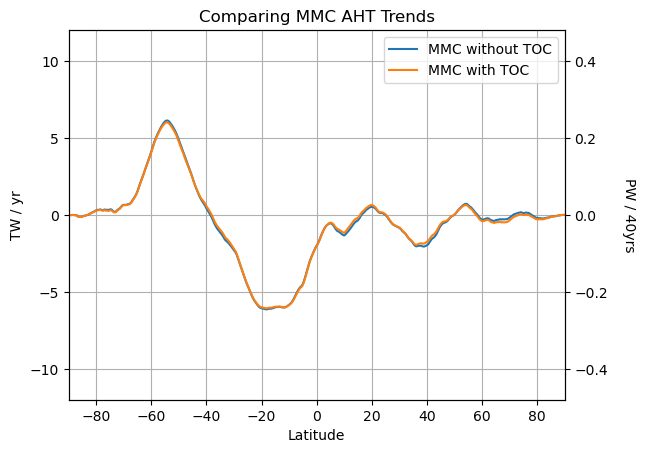

In [33]:
ylims = [-12, 12]
alt_ylims = [-12 * 1e12 / 1e15 * 40, 12 * 1e12 / 1e15 * 40]

plt.plot(era5_orig_ds.latitude, (era5_orig_ds_trend.mmc_aht_polyfit_coefficients.sel(degree=1) /1e12), label='MMC without TOC')
plt.plot(era5_orig_ds.latitude, (era5_new_ds_trend.mmc_aht_polyfit_coefficients.sel(degree=1) / 1e12), label='MMC with TOC')

plt.grid()
plt.xlabel('Latitude')
plt.legend(loc=0)

plt.ylabel('TW / yr')
plt.ylim(ylims)
ax2 = plt.gca().twinx()
ax2.set_ylim(alt_ylims)

ax2.set_ylabel('PW / 40yrs', rotation=270, labelpad=20)

plt.xlim([-90, 90])

plt.title('Comparing MMC AHT Trends')


plt.show()

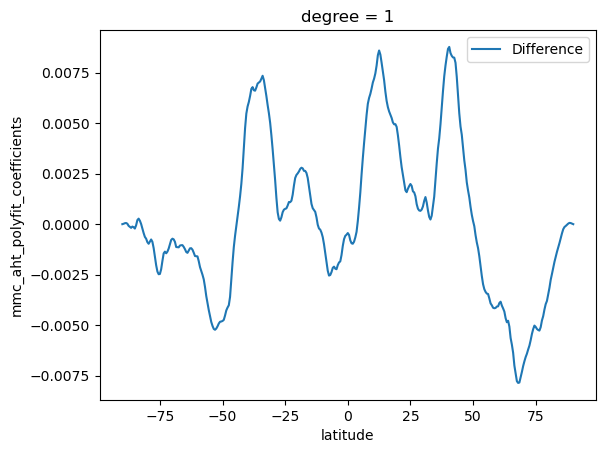

In [14]:
(40 / 1e15 * (era5_new_ds_trend.mmc_aht_polyfit_coefficients - era5_orig_ds_trend.mmc_aht_polyfit_coefficients).sel(degree=1)).plot(label='Difference')
#(40 / 1e15 * era5_new_ds_trend.mmc_aht_polyfit_coefficients.sel(degree=1)).plot(label='Full MMC')

plt.legend(loc=0)
plt.show()